In [3]:
import numpy as np
import pandas as panda

from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import statistics as st

# Практическое задание 1
## Вариант 4

## Задание 1 

Предположим X и Y две случайные переменные, отражающие возраст и рост, соответственно. Рассмотрим случайную выборку из 20 наблюдений:

*X = (75, 72, 91, 71, 62, 70, 54, 42, 66, 69, 62, 96, 78, 74, 59, 71, 55, 68, 65, 93)*  
*Y = (173, 241, 153, 142, 138, 196, 168, 182, 192, 130, 174, 149, 199, 121, 180, 176, 190, 207, 183, 185)*

Необходимо:  

	A. Найти среднее, медиану и моду величины X  
	B. Найти дисперсию Y  
	C. Построить график нормального распределения для X  
	D. Найти вероятность того, что возраст больше 63 
	E. Найти двумерное мат. ожидания и ковариационную матрицу для этих двух величин  
	F. Определить корреляцию между X и Y  
	G. Построить диаграмму рассеяния, отображающая зависимость между возрастом и ростом.  

In [4]:
X = np.array([75, 72, 91, 71, 62, 70, 54, 42, 66, 69, 62, 96, 78, 74, 59, 71, 55, 68, 65, 93])

In [5]:
print("A.")
xMean = X.mean()#среднее
xMedian = st.median(X)#медиана
xMode = st.mode(X)#мода
print('Среднее значения X:', xMean)
print("Медиана X:", xMedian)
print("Мода X:", xMode)

A.
Среднее значения X: 69.65
Медиана X: 69.5
Мода X: 71


In [103]:
print("B.")
xDisp = Y.var()#дисперсия
print("Дисперсия Y:", xDisp)

B.
Дисперсия Y: 787.0475


C.


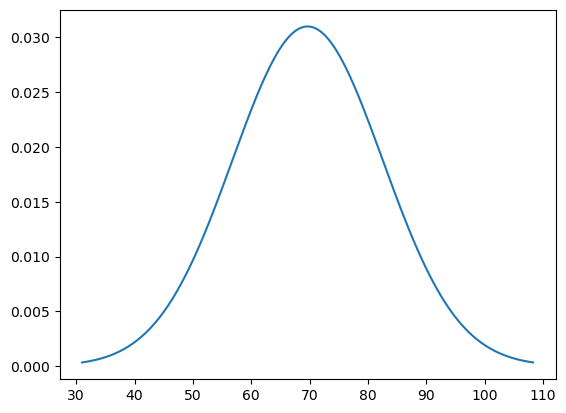

In [68]:
print("C.")
xStd = X.std()
xN = np.linspace(xMean - 3*xStd, xMean + 3*xStd, 200)
#cоздаем последовательность относительно мат. ожидания
yN = stats.norm.pdf(xN, xMean, xStd)#формируем у для нормального
plt.plot(xN, yN); # Выводим график

In [66]:
print("D.")
sample = [i for i in X if i > 63]
print("Вероятность того, что возраст больше 63:", len(sample)/len(X))

D.
Вероятность того, что возраст больше 63: 0.7


In [67]:
print("E.")
Y = np.array([173, 241, 153, 142, 138, 196, 168, 182, 192, 130, 174, 149,
            199, 121, 180, 176, 190, 207, 183, 185])
yMean = Y.mean()

covariance = np.cov(X,Y)
# koefCovariance = covariance[0][1]

inStack = np.stack((X,Y))
#так как формируем вектор, то нужно через стек, чтобы правильно перемножил
mulExValue = np.mean(inStack, axis=1)


print("Вектор двумерного мат. ожидания:",mulExValue)
print("Матрица ковариации: \n", covariance)

E.
Вектор двумерного мат. ожидания: [ 69.65 173.95]
Матрица ковариации: 
 [[174.45       -54.54473684]
 [-54.54473684 828.47105263]]


In [12]:
print("F.")
print ("Коэфициент корреляции: \n", np.corrcoef(X, Y))


F.
Коэфициент корреляции: 
 [[ 1.         -0.14347581]
 [-0.14347581  1.        ]]


G.


Text(0, 0.5, 'Рост')

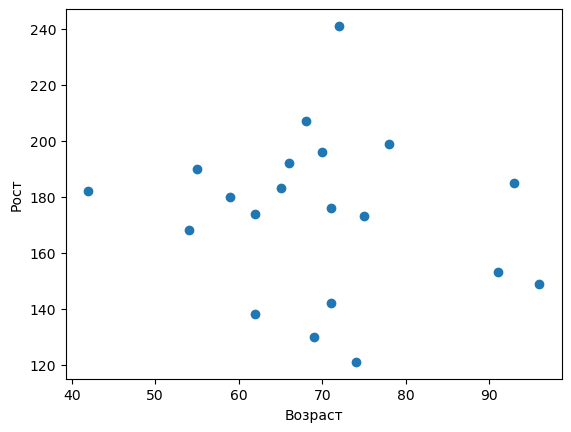

In [18]:
print("G.")
plt.scatter(X,Y);
plt.xlabel("Возраст")
plt.ylabel("Рост")


## Задание 2
Для следующего набора данных

|       | **X<sub>1</sub>** | **X<sub>2</sub>** | **X<sub>3</sub>** |
| :---: | :---------------: | :---------------: | :---------------: |
| **a** |        39         |        43         |        10         |
| **b** |        87         |        66         |        40        |
| **c** |        2        |        3        |        0        |

рассчитайте ковариационную матрицу и обобщенную дисперсию.

In [36]:
array = np.array([(39,43,10), (87,66,40), (2,3,0)])

secCovariance = np.cov(array)
print("Ковариационная матрица: \n ", secCovariance, "\n")

detSecCovariance = np.linalg.det(secCovariance)#обобщенная дисперсия 
# является определителем ковариционной матрицы
print ("Обобщенная дисперсия: ", detSecCovariance)

Ковариационная матрица: 
  [[324.33333333 356.16666667  26.83333333]
 [356.16666667 554.33333333  25.16666667]
 [ 26.83333333  25.16666667   2.33333333]] 

Обобщенная дисперсия:  0.0


## Задание 3
Даны два одномерных нормальных распределения N<sub>a</sub> и N<sub>b</sub> с мат. ожиданиями 5, 3 и СКО 5, 5 соответственно.

    A. Для каждого из значения {4, 6, 7} определите, какое из распределений сгенерировало значение с большей вероятностью.  
	B. Найди значение, которой могло быть сгенерировано обеими распределениями с равной вероятностью.

In [164]:
print("A.\n")

helpData1 = []
helpData2 = []
data = np.array([4, 6, 7])# массив значений

for index,value in enumerate(data):
    helpData1.append(stats.norm.pdf(value, 5, 5))
    helpData2.append(stats.norm.pdf(value, 3, 5))
    if helpData1[index] == helpData2[index]:
        print("Число - ", value, " было сгенерировано c одинакововой вероятностью для Na и для Nb \n")
        continue
    if  helpData1[index] > helpData2[index]:
        print("Число - ", value, " было сгенерировано c большей вероятностью для Na \n")
    else:
         print("Число - ", value, " было сгенерировано c большей вероятностью для Nb \n")

A.

Число -  4  было сгенерировано c одинакововой вероятностью для Na и для Nb 

Число -  6  было сгенерировано c большей вероятностью для Na 

Число -  7  было сгенерировано c большей вероятностью для Na 



B.
Нашли абсолютное равенство, значение случайной величины:  4.0


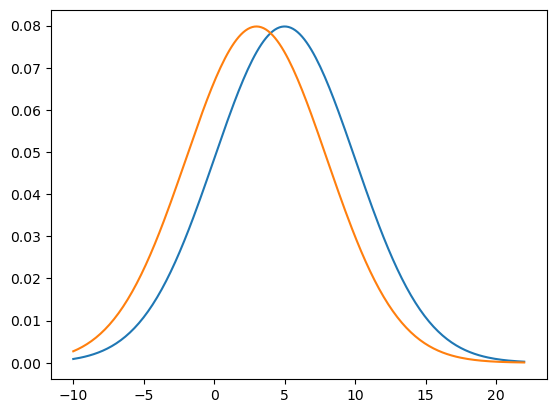

In [165]:
print("B.")
iter=200
xN = np.linspace(-10, 22, iter)#беру для графика
xnN = np.linspace(4, 17, iter)#беру на промежутке, чтобы не затрагивать хвосты
yNa = stats.norm.pdf(xnN, 5, 5)
yNb = stats.norm.pdf(xnN, 3, 5)
yNa1 = stats.norm.pdf(xN, 5, 5)
yNb1 = stats.norm.pdf(xN, 3, 5)


plt.plot(xN, yNa1, label = 'N(5,5)'); # Выводим график
plt.plot(xN, yNb1, label = 'N(3,5)'); # Выводим график

resArray = abs(np.asarray(yNa)-np.asarray(yNb))

limitations = 0.00002 ################УСТАНОВКА ЛИМИТА исключительно для отрезка, который не захватывает хвосты

for i in resArray:
    if i < limitations:
        if i == 0:
            print ("Нашли абсолютное равенство, значение случайной величины: ", xnN[resArray.tolist().index(i)])
            continue
        print("Нашли равенство вероятностей с установленным лимитом, значение случайной величины в точке: ",xnN[resArray.tolist().index(i)])
 